# **LOAD DATASET**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Langkah pertama yaitu membaca file CSV dan menampilkan 10 baris pertama dari dataset stroke prediction menggunakan library Pandas

In [ ]:
new_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv")
new_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Langkah selanjutnya menggunakan metode info() dari DataFrame Pandas untuk menampilkan informasi singkat tentang DataFrame new_data

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Melakukan pengecekan missing value, dari output tersebut diketahui terdapat missing value pada feature bmi sebanyak 201

In [ ]:
new_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
new_data = new_data.drop('id', axis=1)

# **PRE-PROCESSING**

## **Data Cleaning**

Oleh karena itu, dilakukan data cleaning untuk mengisi missing value menggunakan nilai median dari feature bmi.

In [ ]:
new_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
new_data['bmi']=new_data['bmi'].fillna(new_data['bmi'].median())
new_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## **Data Discretization**


Data discretization ini dilakukan untuk mengelompokkan nilai-nilai numerik ke dalam rentang nilai tertentu.
1. feature **age** menjadi:
  - Anak-anak: 0-18 tahun
  - Dewasa: 19-60 tahun
  - Lansia: >60 tahun
2. feature **avg_glucose_level** menjadi:
  - Normal: <100 mg/dL
  - Pra-diabetes: 100-125 mg/dL
  - Diabetes: >=126 mg/dL
3. feature **bmi** menjadi:
  - Underweight: <18.5
  - Normal: 18.5-24.9
  - Overweight: 25-29.9
  - Obesitas: >=30

In [ ]:
age_col = "age"
new_data["age_category"] = pd.cut(new_data[age_col], bins=[0, 18, 60, np.inf], labels=["anak-anak", "dewasa", "lansia"])

glucose_col = "avg_glucose_level"
new_data["glucose_category"] = pd.cut(new_data[glucose_col], bins=[0, 100, 125, np.inf], labels=["normal", "pra-diabetes", "diabetes"])

bmi_col = "bmi"
new_data["bmi_category"] = pd.cut(new_data[bmi_col], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=["underweight", "normal", "overweight", "obesitas"])

print(new_data)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
print(new_data.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  5110.000000  5110.000000  
mean     28.862035     0.048728  
std       7.699562     0.215320  
min      10.300000     0.000000  
25%      23.800000     0.000000  
50%      28.100000     0.000000  
75%      32.800000     0.000000  
max      97.600000     1.000000  


In [ ]:
new_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_category', 'glucose_category',
       'bmi_category'],
      dtype='object')

Kode di bawah digunakan untuk membuat histogram dari fature "age" sebagai alat visualisasi data yang membantu dalam memahami distribusi frekuensi dari data numerik. Visualisasi histogram dapat melihat bagaimana data usia tersebar, serta mengidentifikasi rentang usia yang paling umum dalam dataset.

In [ ]:
# Value Counts
print(new_data['gender'].value_counts())
print(new_data['ever_married'].value_counts())
print(new_data['work_type'].value_counts())
print(new_data['Residence_type'].value_counts())
print(new_data['smoking_status'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


Kode di bawah digunakan untuk membuat diagram batang yang memvisualisasikan frekuensi masing-masing kategori dalam kolom "smoking_status"

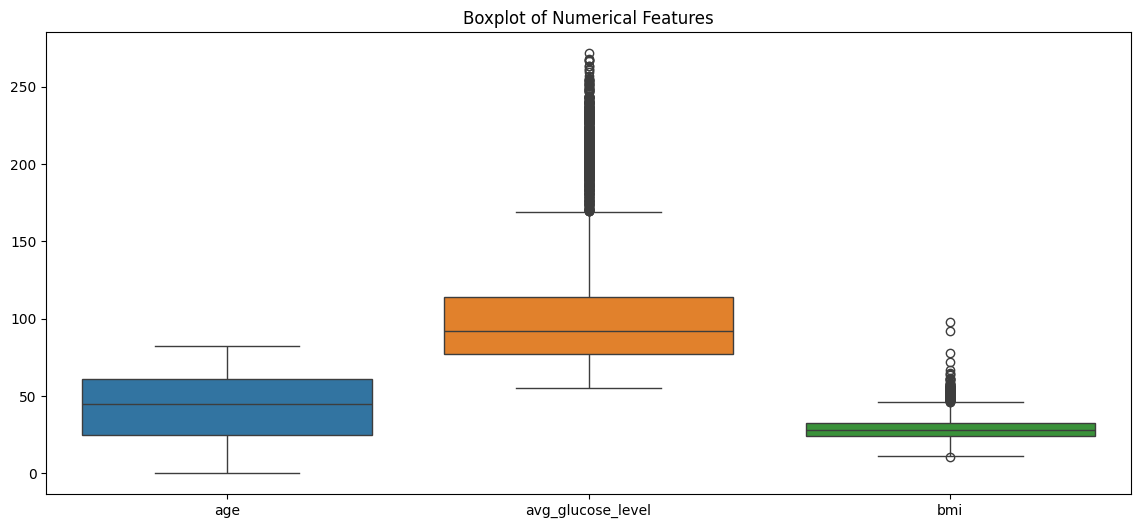

In [ ]:
# Distribution of Numerical Features
plt.figure(figsize=(14, 6))
sns.boxplot(data=new_data[['age', 'avg_glucose_level', 'bmi']])
plt.title('Boxplot of Numerical Features')
plt.show()

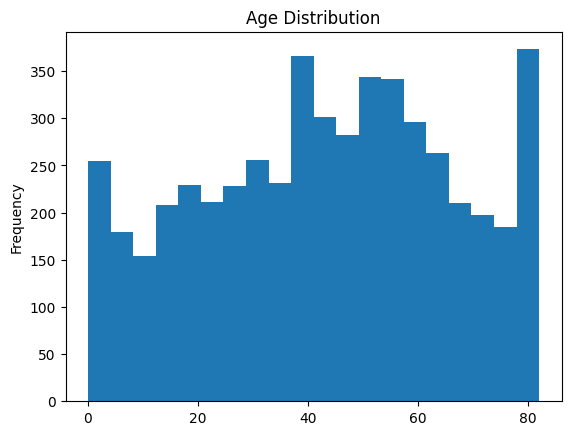

In [ ]:
new_data['age'].plot.hist(title='Age Distribution', bins=20)
plt.show()

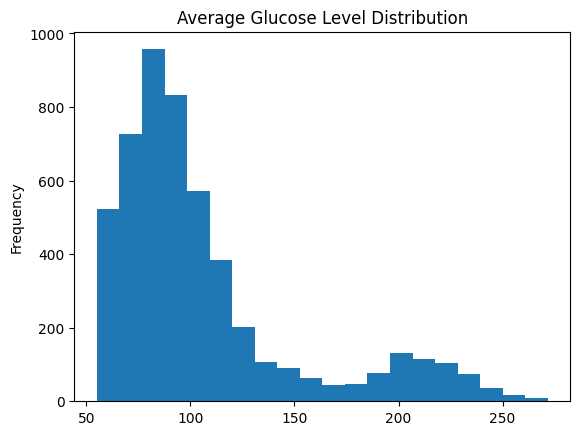

In [ ]:
new_data['avg_glucose_level'].plot.hist(title='Average Glucose Level Distribution', bins=20)
plt.show()

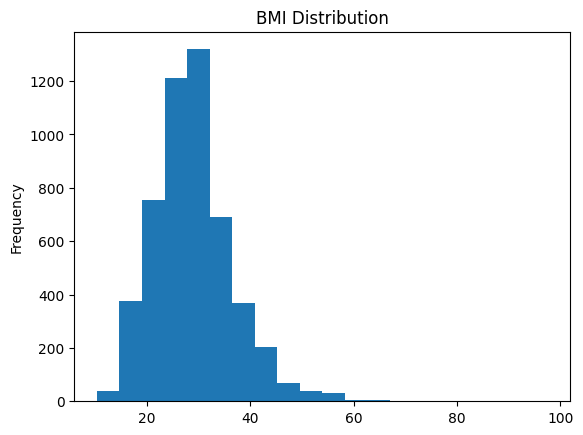

In [ ]:
new_data['bmi'].plot.hist(title='BMI Distribution', bins=20)
plt.show()

<ipython-input-91-5840594f3fbf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=new_data, palette="Blues")


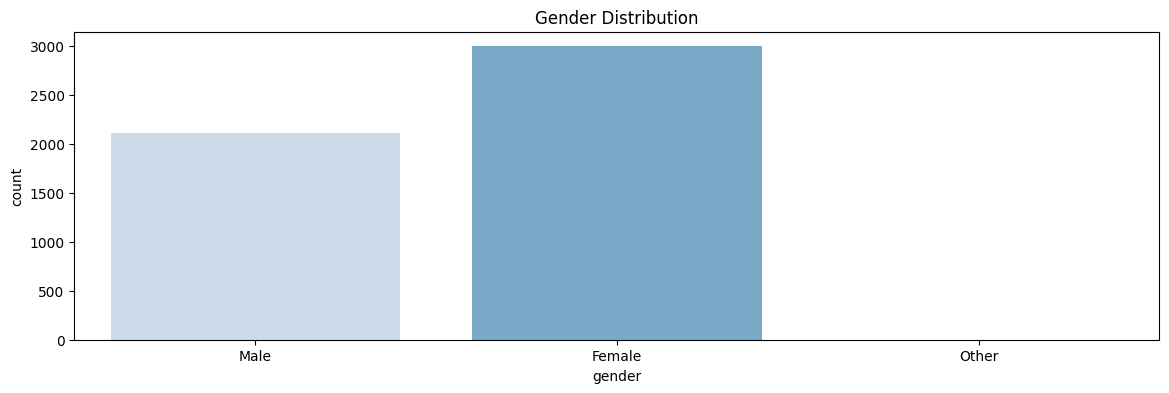

In [ ]:
# Count Plots for Categorical Features
plt.figure(figsize=(14, 4))
sns.countplot(x="gender", data=new_data, palette="Blues")
plt.title('Gender Distribution')
plt.show()

<ipython-input-92-1ba3b97613cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ever_married", data=new_data, palette="Blues")


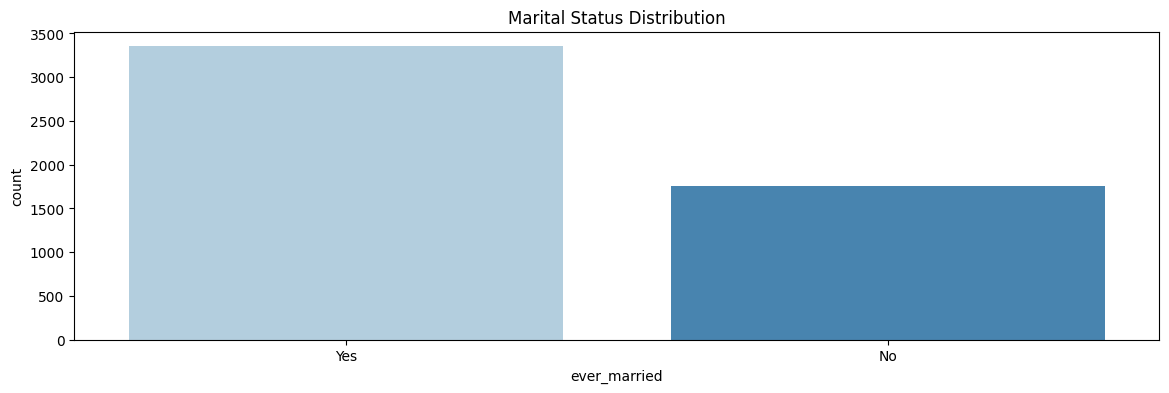

In [ ]:
plt.figure(figsize=(14, 4))
sns.countplot(x="ever_married", data=new_data, palette="Blues")
plt.title('Marital Status Distribution')
plt.show()

<ipython-input-93-a74cac4a4412>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="work_type", data=new_data, palette="Blues")


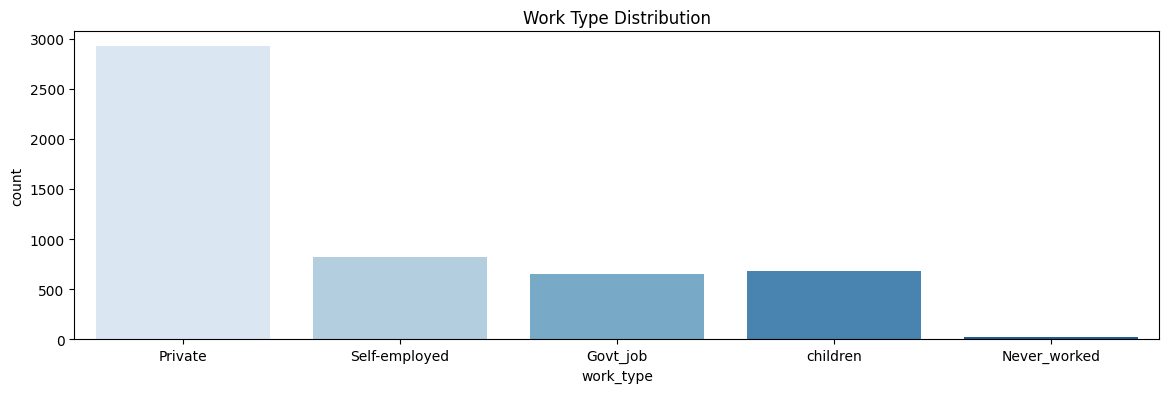

In [ ]:
plt.figure(figsize=(14, 4))
sns.countplot(x="work_type", data=new_data, palette="Blues")
plt.title('Work Type Distribution')
plt.show()

<ipython-input-94-6dbea65137e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Residence_type", data=new_data, palette="Blues")


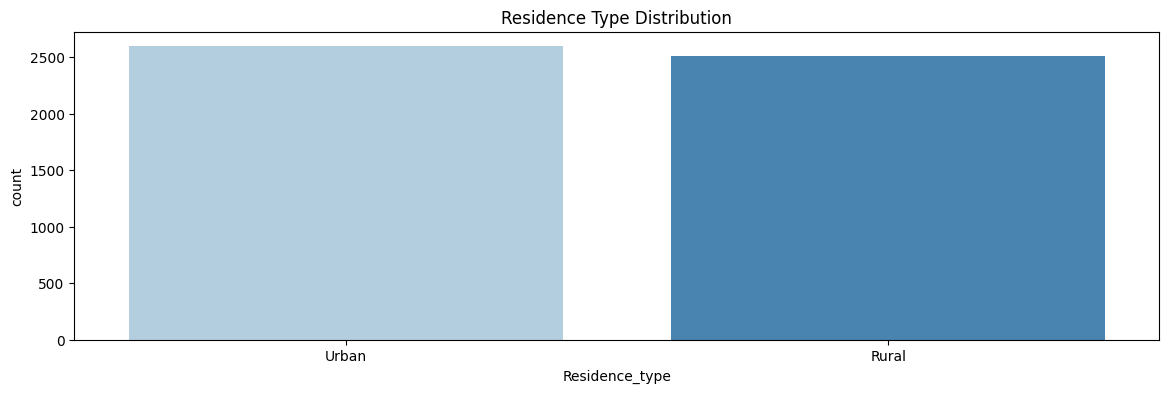

In [ ]:
plt.figure(figsize=(14, 4))
sns.countplot(x="Residence_type", data=new_data, palette="Blues")
plt.title('Residence Type Distribution')
plt.show()

<ipython-input-95-1ea44ab91190>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="smoking_status", data=new_data, palette="Blues")


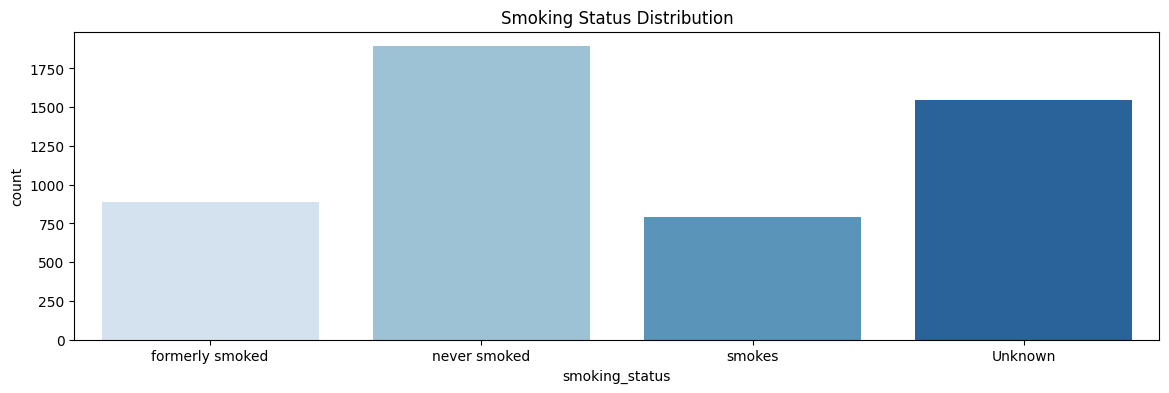

In [ ]:
plt.figure(figsize=(14, 4))
sns.countplot(x="smoking_status", data=new_data, palette="Blues")
plt.title('Smoking Status Distribution')
plt.show()

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


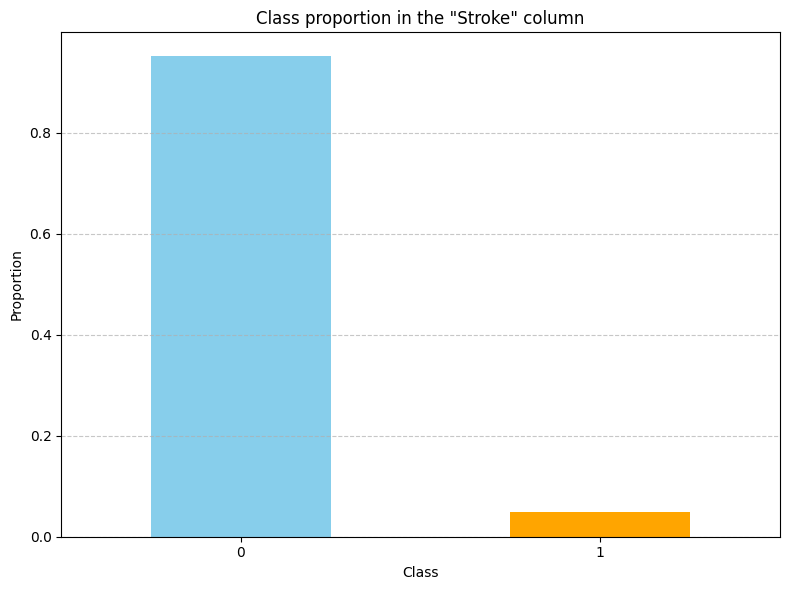

In [ ]:
label_proportion = new_data["stroke"].value_counts(normalize=True)
print(label_proportion)
plt.figure(figsize=(8, 6))
label_proportion.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class proportion in the "Stroke" column')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

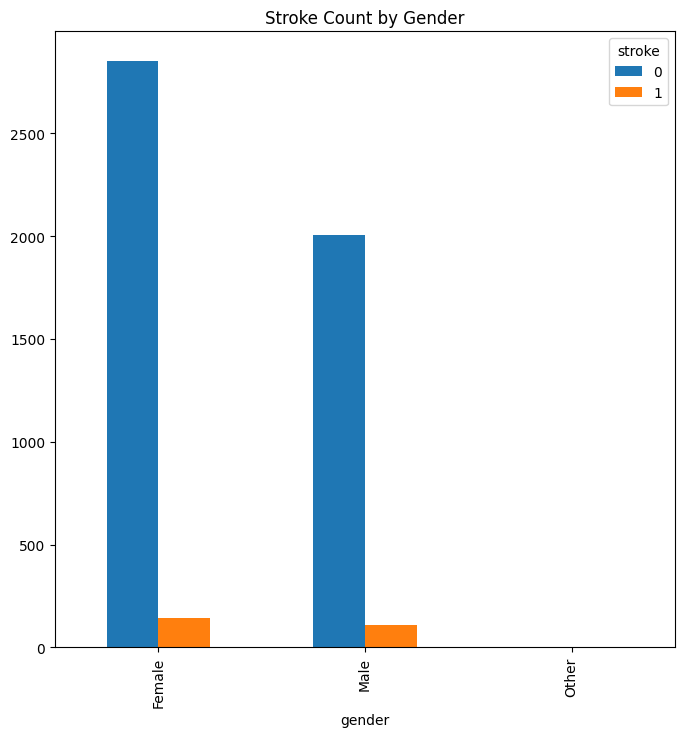

In [ ]:
# Crosstabs and Count Plots
gender_stroke = pd.crosstab(new_data['gender'], new_data['stroke'])
gender_stroke.plot(kind='bar', figsize=(8, 8))
plt.title('Stroke Count by Gender')
plt.show()

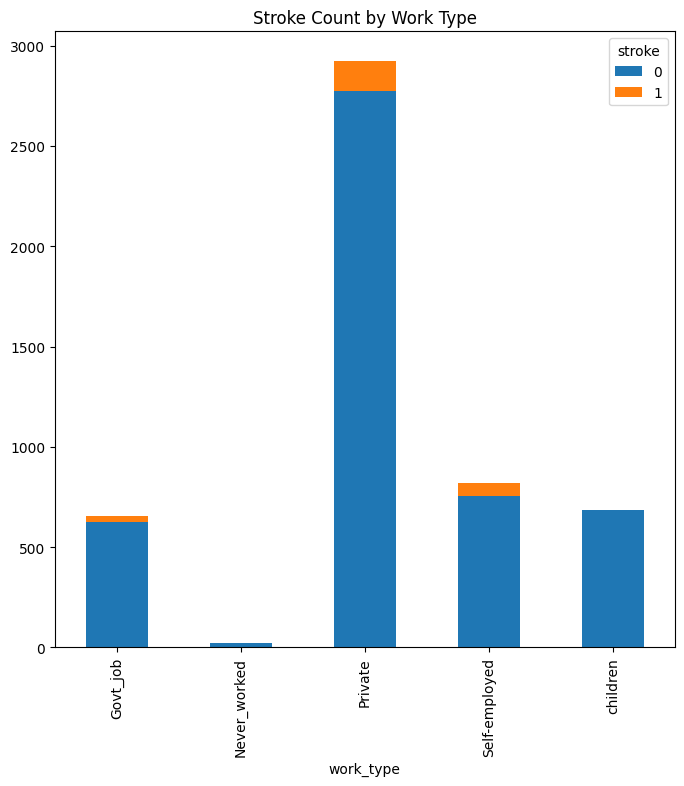

In [ ]:
worktype_stroke = pd.crosstab(new_data['work_type'], new_data['stroke'])
worktype_stroke.plot(kind='bar', figsize=(8, 8), stacked=True)
plt.title('Stroke Count by Work Type')
plt.show()

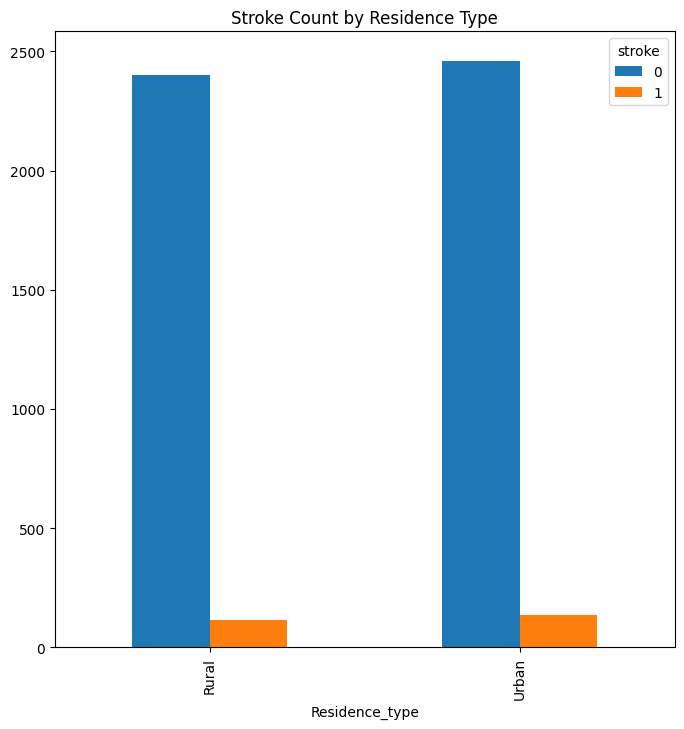

In [ ]:
residence_stroke = pd.crosstab(new_data['Residence_type'], new_data['stroke'])
residence_stroke.plot(kind='bar', figsize=(8, 8))
plt.title('Stroke Count by Residence Type')
plt.show()

## Label Encoder

Kode di bawah digunakan untuk mengubah data kategorikal ("gender", "ever_married" ,"Residence_type","smoking_status",dan "work_type") menjadi data numerik menggunakan LabelEncoder

In [ ]:
new_col = ["gender", "ever_married" ,"Residence_type","smoking_status","work_type", "age_category", "glucose_category", "bmi_category",]
new_encoder = preprocessing.LabelEncoder()
for col in new_col:
    new_data[col]=  new_encoder.fit_transform(new_data[col])

###Heatmap

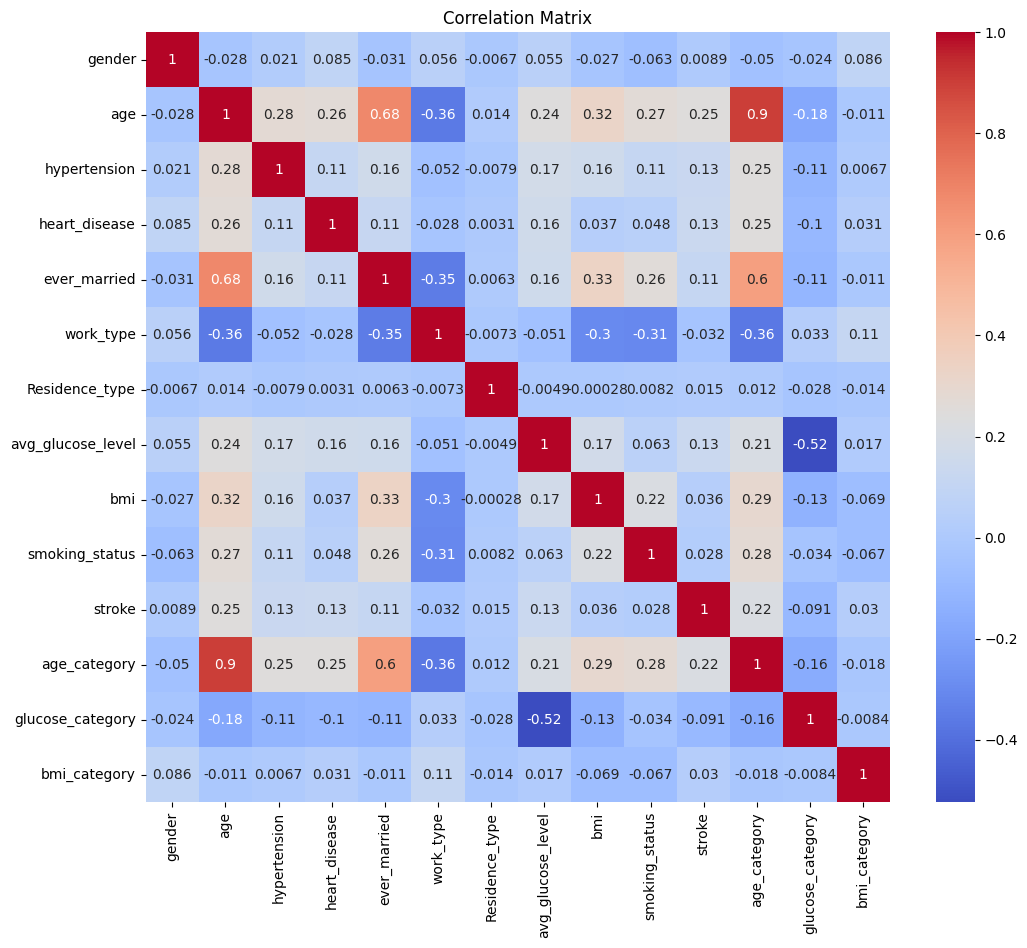

In [ ]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
new_data.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_category', 'glucose_category',
       'bmi_category'],
      dtype='object')

In [ ]:
new_data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,glucose_category,bmi_category
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,2,0,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1,2,0,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,2,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,1,0,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,2,0,0


<Axes: >

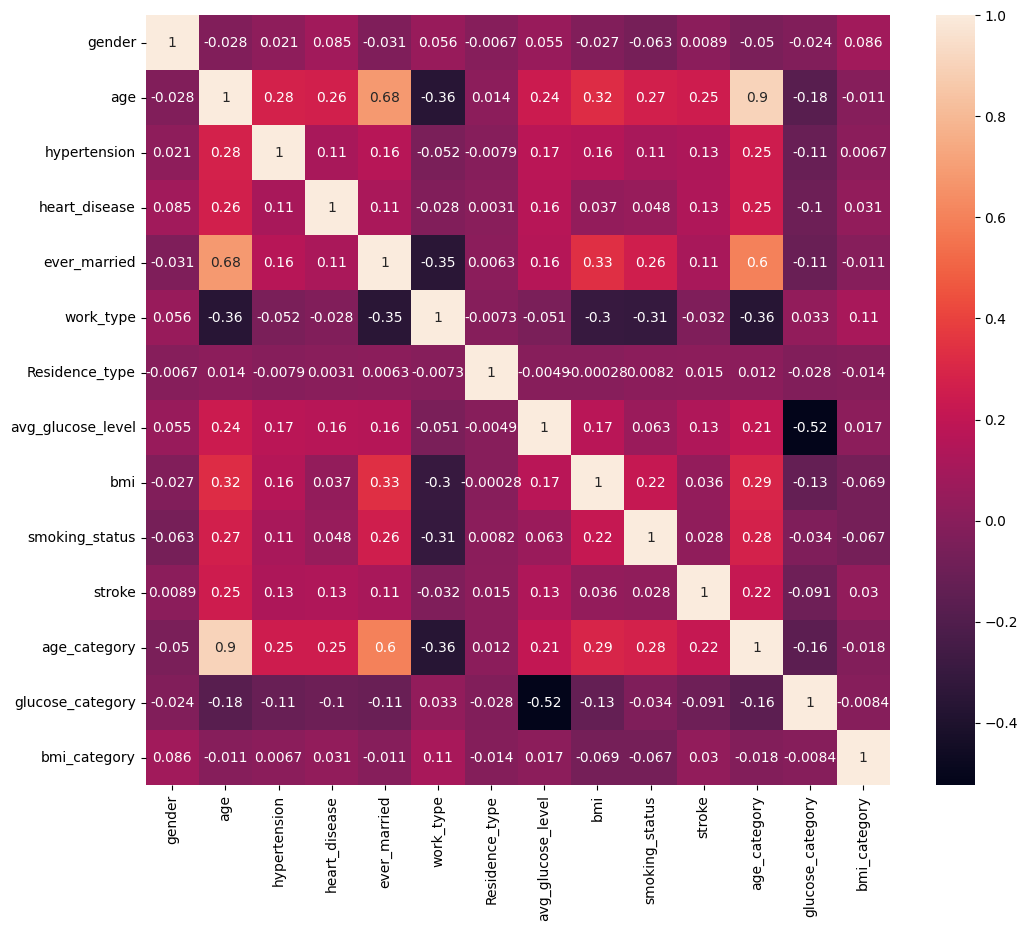

In [ ]:
c, axes = plt.subplots(figsize = (12,10))
sns.heatmap(new_data.corr(), annot=True, ax=axes)

# **ALGORITMA DATA MINING TASK**

## **1. Logistic Regression**

In [ ]:
## To drop the predictor variable 'stroke' from the independent variables for
x=new_data.drop(['stroke'],axis=1)
y=new_data['stroke']

In [ ]:
x.shape

(5110, 13)

In [ ]:
y.shape

(5110,)

Kode di bawah digunakan untuk membagi dataset yang telah di-oversampling menjadi set pelatihan (training set) dan set pengujian (testing set).

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
## To represent the number of observations after splitting.
x_train.shape,x_test.shape

((4088, 13), (1022, 13))

In [ ]:
# To count the total number of strokes present in our data frame.
new_data['stroke'].value_counts()


stroke
0    4861
1     249
Name: count, dtype: int64

In [ ]:
## Standard scaler is used for normalization of our training and testing data.
sca=StandardScaler()
x_train=sca.fit_transform(x_train)
x_test=sca.fit_transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression as LgRg
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score

Kode di bawah digunakan untuk melatih dan mengevaluasi model machine learning menggunakan Logistic Regression

In [ ]:
#membuat instance dari model Logistic Regression
lg= LgRg()

#melatih model Logistic Regression menggunakan data pelatihan (x_train dan y_train).
lg.fit(x_train,y_train)

#membuat prediksi pada data pengujian (x_test) menggunakan model yang telah dilatih
y_lg_pred = lg.predict(x_test)

#menghitung akurasi prediksi dan mengonversinya ke persentase
score_lg=accuracy_score(y_test,y_lg_pred)*100
print("training accuracy score: ",accuracy_score(y_train,lg.predict(x_train))*100)
print("testing accuracy score: ",score_lg)

#mencetak skor F1 pada data train
print("F1 score", f1_score(y_train,lg.predict(x_train)))

training accuracy score:  95.22994129158513
testing accuracy score:  94.81409001956948
F1 score 0.0


In [ ]:
# Predicting Feature Importance of Logistic Regression Model
imp = lg.coef_[0]

 Kode di bawah digunakan untuk mencetak informasi tentang seberapa pentingnya setiap feature dalam model yang telah dibuat.

In [ ]:
for i,v in enumerate(imp):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.02291
Feature: 1, Score: 1.94574
Feature: 2, Score: 0.06648
Feature: 3, Score: 0.10196
Feature: 4, Score: -0.12990
Feature: 5, Score: -0.03572
Feature: 6, Score: 0.06112
Feature: 7, Score: 0.17320
Feature: 8, Score: -0.00876
Feature: 9, Score: -0.00475
Feature: 10, Score: -0.25846
Feature: 11, Score: 0.03245
Feature: 12, Score: 0.14665


In [ ]:
from sklearn.metrics import classification_report

y_new = lg.predict_proba(x_test)[:,1] >= 0.7

report = classification_report(y_test, y_new)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kode di bawah digunakan untuk membuat bar plot yang menampilkan pentingnya setiap feature dalam model yang telah dilatih. Dengan ber plot ini, dapat langsung dilihat seberapa penting setiap ffeature. Semakin tinggi batangnya, semakin penting fitur itu dalam membuat prediksi yang akurat.

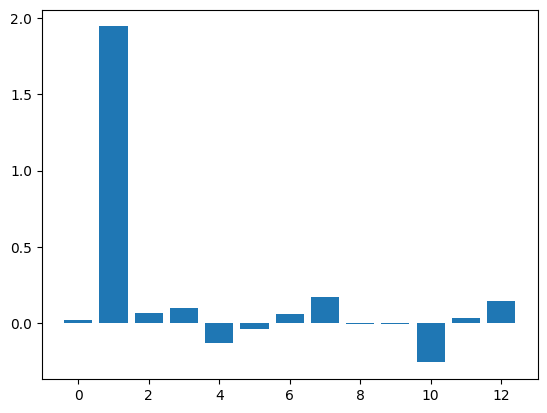

In [ ]:
plt.bar([x for x in range(len(imp))], imp)
plt.show()

##  **2. Decision Tree Classifier**

In [ ]:
# Performing Decision Tree Classifier with Random State = 20
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=20)


Kode di bawah digunakan untuk melatih model Decision Tree (dt_model) menggunakan data pelatihan (x_train dan y_train)

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=20)

In [ ]:
# Predicting the score of our Decision Tree Classifier on Training DataFrame
dt_model.score(x_train,y_train)

1.0

Kode di bawah digunakan untuk menghitung akurasi model Decision Tree (dt_model) pada data pengujian (x_test dan y_test).

In [ ]:
dt_model.score(x_test,y_test)

0.9158512720156555

Kode di dibawah digunakan untuk membuat prediksi menggunakan model Decision Tree (dt_model) pada data pelatihan (x_train).

In [ ]:
dt_model.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

Kode dibawah digunakan untuk memprediksi nilai target dari data pelatihan (x_train) menggunakan model Decision Tree (dt_model).

In [ ]:
dt_model.predict_proba(x_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Kode di bawah digunakan untuk memperoleh probabilitas prediksi dari kelas positif (1) dari model Decision Tree (dt_model) untuk setiap sampel dalam data pengujian (x_test):
- dt_model.predict_proba(x_test): Menghasilkan probabilitas prediksi untuk setiap kelas target untuk setiap sampel dalam data test. Hasilnya adalah matriks dengan dua kolom, di mana kolom pertama berisi probabilitas prediksi untuk kelas 0 (negatif) dan kolom kedua berisi probabilitas prediksi untuk kelas 1 (positif).

- [:,1]: Ini memilih semua baris dari kolom kedua (indeks 1), yang berisi probabilitas prediksi untuk kelas positif. Dengan demikian, diperoleh array yang berisi probabilitas prediksi untuk kelas positif dari setiap sampel dalam data pengujian.

In [ ]:
y_pred=dt_model.predict_proba(x_test)[:,1]


Kode di bawah digunakan untuk membuat klasifikasi berdasarkan probabilitas prediksi yang dihasilkan oleh model Decision Tree. Hasilnya adalah list y_new yang berisi klasifikasi baru berdasarkan probabilitas prediksi dari model Decision Tree, dengan threshold probabilitas sebesar 0.7.

In [ ]:
# Membuat list kosong
y_new=[]

#Iterasi melalui setiao probabilitas prediksi
for i in range(len(y_pred)):
  #Memeriksa apakah probabilitas prediksi untuk sampel ke-i <= 0.7. Jika ya, maka klasifikasikan sampel tersebut sebagai kelas 0 (negatif).
 if y_pred[i]<=0.7:
    y_new.append(0)
    # Jika probabilitas prediksi untuk sampel ke-i > 0.7, maka klasifikasikan sampel tersebut sebagai kelas 1 (positif).
 else:
    y_new.append(1)


Kode di bawah digunakan untuk menghitung akurasi dari klasifikasi baru (y_new) yang dibuat berdasarkan probabilitas prediksi model Decision Tree terhadap data pengujian (y_test). Hasilnya adalah skor akurasi, yang mencerminkan seberapa baik klasifikasi baru (y_new) berhasil memprediksi label target sebenarnya (y_test). Semakin tinggi skornya, semakin baik klasifikasi baru tersebut dalam memprediksi label target yang benar.

In [ ]:
accuracy_score(y_test,y_new)


0.9158512720156555

Kode di atas digunakan untuk menghitung akurasi model Decision Tree pada data train dan data test untuk berbagai kedalaman maksimum (max_depth) yang berbeda

In [ ]:
# Membuat list kosong
train_accuracy=[]
test_accuracy=[]

#Melakukan iterasi dari kedalaman maks 1-9.
for depth in range(1,10):
 dt_model=DecisionTreeClassifier(max_depth=depth,random_state=20)
 dt_model.fit(x_train,y_train)
 train_accuracy.append(dt_model.score(x_train,y_train))
 test_accuracy.append(dt_model.score(x_test,y_test))


Kode di bawah digunakan untuk membuat DataFrame frame yang berisi skor akurasi dari model Decision Tree pada data train dan test untuk berbagai nilai kedalaman maksimum yang berbeda. Dengan DataFrame ini, dapat dialisis bagaimana skor akurasi pada data train dan test berubah seiring dengan peningkatan kedalaman maksimum model Decision Tree.

In [ ]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'test_cc':test_accuracy})
frame.head()

,max_depth,train_acc,test_cc
0,1,0.952299,0.947162
1,2,0.952789,0.946184
2,3,0.952789,0.946184
3,4,0.953278,0.945205
4,5,0.953767,0.944227


Kode di bawah bertujuan untuk memvisualisasikan kinerja model Decision Tree pada data train dan test untuk berbagai kedalaman maksimum yang berbeda.

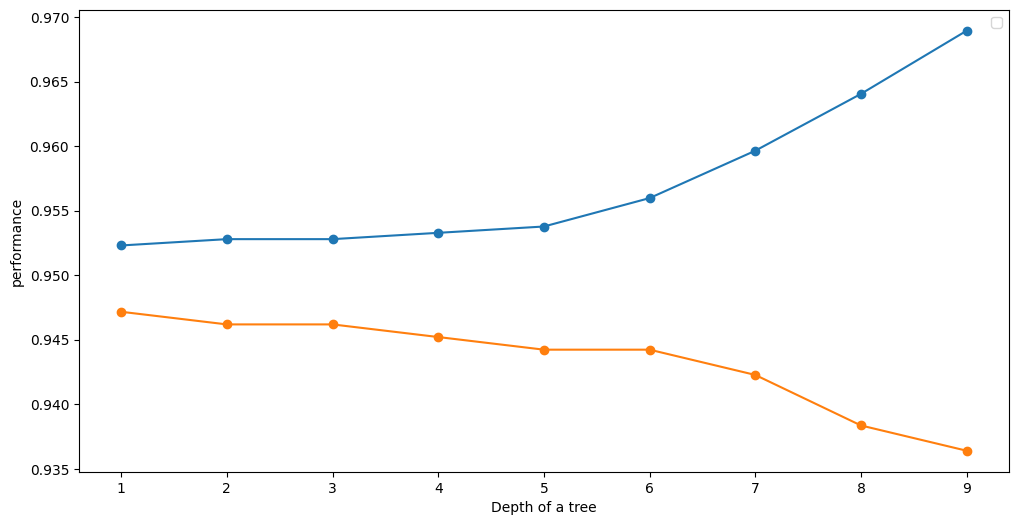

In [ ]:
# Finding the Depth Of Tree to optimize the Decision Tree Classifier
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o')
plt.plot(frame['max_depth'],frame['test_cc'],marker='o')
plt.xlabel('Depth of a tree')
plt.ylabel('performance')
plt.legend()


In [ ]:
# Predicting Feature Importance of Decision Tree Classifier
imp3 = dt_model.feature_importances_

In [ ]:
for i,v in enumerate(imp3):
        print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02516
Feature: 1, Score: 0.24597
Feature: 2, Score: 0.03422
Feature: 3, Score: 0.02499
Feature: 4, Score: 0.01647
Feature: 5, Score: 0.03272
Feature: 6, Score: 0.03581
Feature: 7, Score: 0.25274
Feature: 8, Score: 0.27195
Feature: 9, Score: 0.04511
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00390
Feature: 12, Score: 0.01097


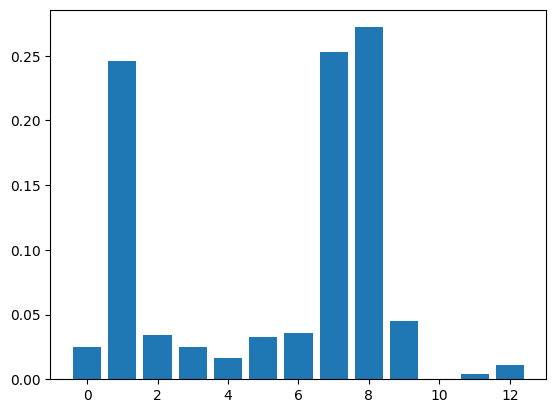

In [ ]:
# Plotting Feature Importance of Decision Tree Classifier
plt.bar([x for x in range(len(imp3))], imp3)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Evaluasi model
report = classification_report(y_test, y_new)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       968
           1       0.15      0.13      0.14        54

    accuracy                           0.92      1022
   macro avg       0.55      0.54      0.55      1022
weighted avg       0.91      0.92      0.91      1022



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
pip install pandas numpy seaborn matplotlib scikit-learn xgboost

## **3. XGboost**

In [ ]:
# XGBoost
xgboost = xgb.XGBClassifier()
xgboost.fit(x_train, y_train)
xgboost_pred = xgboost.predict(x_test)
print("Akurasi XGBoost:", accuracy_score(y_test, xgboost_pred))
print(confusion_matrix(y_test, xgboost_pred))
print(classification_report(y_test, xgboost_pred))

Akurasi XGBoost: 0.9403131115459883
[[960   8]
 [ 53   1]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.11      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.53      0.51      0.50      1022
weighted avg       0.90      0.94      0.92      1022



## **4. Naive Bayes**

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes_pred = naive_bayes.predict(x_test)
print("Akurasi Naive Bayes:", accuracy_score(y_test, naive_bayes_pred))
print(confusion_matrix(y_test, naive_bayes_pred))
print(classification_report(y_test, naive_bayes_pred))

Akurasi Naive Bayes: 0.8698630136986302
[[862 106]
 [ 27  27]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       968
           1       0.20      0.50      0.29        54

    accuracy                           0.87      1022
   macro avg       0.59      0.70      0.61      1022
weighted avg       0.93      0.87      0.89      1022



## **5. Random Forest**

In [ ]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
random_forest_pred = random_forest.predict(x_test)
print("Akurasi Random Forest:", accuracy_score(y_test, random_forest_pred))
print(confusion_matrix(y_test, random_forest_pred))
print(classification_report(y_test, random_forest_pred))

Akurasi Random Forest: 0.9461839530332681
[[967   1]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



# **FEATURE SELECTION**

## **CHI SQUARE / CHI2**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns

Memilih fitur-fitur yang paling informatif dari data latih berdasarkan skor chi-kuadrat, serta untuk memvisualisasikan pentingnya masing-masing fitur tersebut.

              Feature  Chi2 Score
3       heart_disease   85.773613
2        hypertension   41.404777
10       age_category   41.266144
1                 age   36.779921
4        ever_married   14.679070
7   avg_glucose_level    9.824540
11   glucose_category    4.783447
12       bmi_category    0.709717
6      Residence_type    0.600941
9      smoking_status    0.563983
5           work_type    0.418708
0              gender    0.210298
8                 bmi    0.112094


<ipython-input-180-81a0752a14dc>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi2 Score', y='Feature', data=feature_scores, palette="Blues_d")


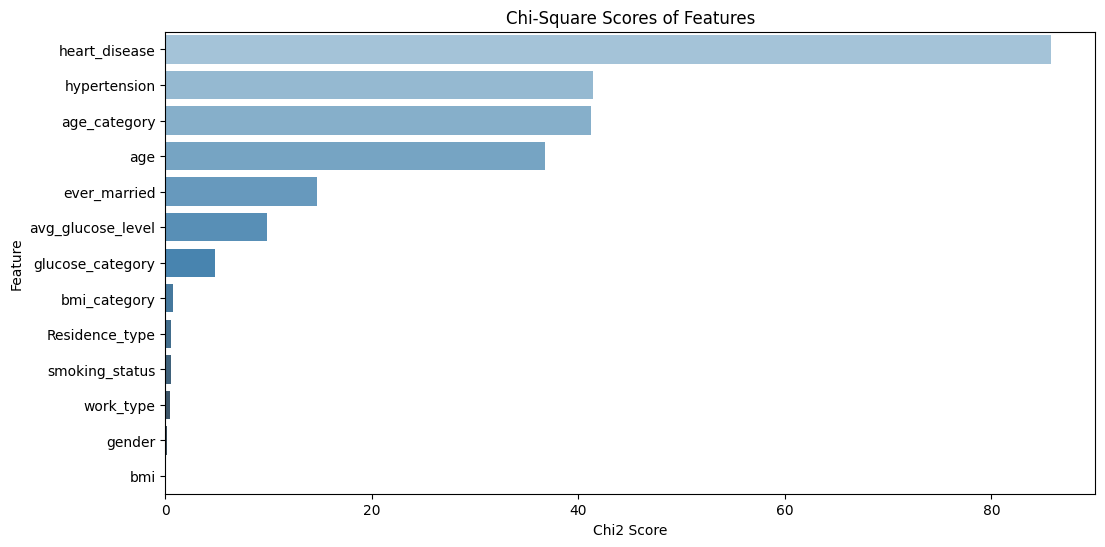

In [ ]:
# Creating DataFrames for training and testing data
x_train_df = pd.DataFrame(x_train, columns=x.columns)
x_test_df = pd.DataFrame(x_test, columns=x.columns)

# Scale data to [0, 1] for chi2 feature selection
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_df)
x_test_scaled = scaler.transform(x_test_df)

# Apply SelectKBest with chi2 score function on the training data
chi2_selector = SelectKBest(score_func=chi2, k='all')
X_kbest_train = chi2_selector.fit_transform(x_train_scaled, y_train)

# Get chi2 scores
chi2_scores = chi2_selector.scores_

# Create DataFrame for scores
feature_scores = pd.DataFrame({'Feature': x_train_df.columns, 'Chi2 Score': chi2_scores})
feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)

# Display scores
print(feature_scores)

# Visualize scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Chi2 Score', y='Feature', data=feature_scores, palette="Blues_d")
plt.title('Chi-Square Scores of Features')
plt.show()

###Naive Bayes

Seleksi fitur menggunakan Chi2 dan menggunakan model Naive Bayes untuk mengklasifikasikan data.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

results = []
num_features = x_train_scaled.shape[1]

for k in range(1, num_features + 1):
    chi2_selector = SelectKBest(chi2, k=k)
    X_kbest_train = chi2_selector.fit_transform(x_train_scaled, y_train)
    X_kbest_test = chi2_selector.transform(x_test_scaled)
    selected_indices = chi2_selector.get_support(indices=True)
    selected_features = [x_train_df.columns[i] for i in selected_indices]

    nb = GaussianNB()
    nb.fit(X_kbest_train, y_train)

    y_pred_test = nb.predict(X_kbest_test)

    report = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_features, accuracy_from_report, y_pred_test))

    # Displaying results for the current number of features
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_features}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test, zero_division=0))
    print("\n")


Number of features selected: 1
Selected features: ['heart_disease']
Model Accuracy: 0.9080234833659491
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       968
           1       0.13      0.13      0.13        54

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022



Number of features selected: 2
Selected features: ['hypertension', 'heart_disease']
Model Accuracy: 0.9080234833659491
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       968
           1       0.13      0.13      0.13        54

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022



Number of features selected: 3
Selected features: ['hypertension', 'heart_

In [ ]:
# Menentukan hasil terbaik berdasarkan akurasi
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, y_pred_test = best_result
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))

Number of features selected: 1
Selected features: ['heart_disease']
Model Accuracy: 0.9080234833659491
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       968
           1       0.13      0.13      0.13        54

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022



###Decision Tree

Seleksi fitur menggunakan Chi2 dan menggunakan model Decision Tree untuk mengklasifikasikan data.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

results = []

for k in range(1, num_features + 1):
    chi2_selector = SelectKBest(chi2, k=k)
    X_kbest_train = chi2_selector.fit_transform(x_train_scaled, y_train)
    X_kbest_test = chi2_selector.transform(x_test_scaled)
    selected_indices = chi2_selector.get_support(indices=True)
    selected_features = [x_train_df.columns[i] for i in selected_indices]

    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_kbest_train, y_train)

    y_pred_test = dt.predict(X_kbest_test)

    report = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']
    weighted_avg = report['weighted avg']

    results.append((k, selected_features, accuracy_from_report, y_pred_test))

    # Displaying results for the current number of features
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_features}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test, zero_division=0))
    print("\n")


Number of features selected: 1
Selected features: ['heart_disease']
Model Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



Number of features selected: 2
Selected features: ['hypertension', 'heart_disease']
Model Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



Number of features selected: 3
Selected features: ['hypertension', 'heart_

In [ ]:
# Menentukan hasil terbaik berdasarkan akurasi
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, y_pred_test = best_result
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))

Number of features selected: 1
Selected features: ['heart_disease']
Model Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



###Logistic Rgression

Seleksi fitur menggunakan Chi2 dan menggunakan model Logistic Regression untuk mengklasifikasikan data.

In [ ]:
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

results = []

for k in range(1, num_features + 1):
    chi2_selector = SelectKBest(chi2, k=k)
    X_kbest_train = chi2_selector.fit_transform(x_train_scaled, y_train)
    X_kbest_test = chi2_selector.transform(x_test_scaled)
    selected_indices = chi2_selector.get_support(indices=True)
    selected_features = [x_train_df.columns[i] for i in selected_indices]

    lr = LogisticRegression(max_iter=1000, random_state=0)
    lr.fit(X_kbest_train, y_train)

    y_pred_test = lr.predict(X_kbest_test)

    report = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_features, accuracy_from_report, report))

# Displaying results for the best number of features
for result in results:
    k, selected_features, accuracy_from_report, report = result
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_features}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test, zero_division=0))
    print("\n")

Number of features selected: 1
Selected features: ['heart_disease']
Model Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



Number of features selected: 2
Selected features: ['hypertension', 'heart_disease']
Model Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



Number of features selected: 3
Selected features: ['hypertension', 'heart_

In [ ]:
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report = best_result
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')

Number of features selected: 1
Selected features: ['heart_disease']
Model Accuracy: 0.9471624266144814


###Random Forest

Seleksi fitur menggunakan Chi2 dan menggunakan model Random Forest untuk mengklasifikasikan data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

results = []

for k in range(1, num_features + 1):
    chi2_selector = SelectKBest(chi2, k=k)
    X_kbest_train = chi2_selector.fit_transform(x_train_scaled, y_train)
    X_kbest_test = chi2_selector.transform(x_test_scaled)
    selected_indices = chi2_selector.get_support(indices=True)
    selected_features = [x_train_df.columns[i] for i in selected_indices]

    rf = RandomForestClassifier(random_state=0)
    rf.fit(X_kbest_train, y_train)

    y_pred_test = rf.predict(X_kbest_test)

    report = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_features, accuracy_from_report, report))

# Displaying results for the best number of features
for result in results:
    k, selected_features, accuracy_from_report, report = result
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_features}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test, zero_division=0))
    print("\n")


Number of features selected: 1
Selected features: ['heart_disease']
Model Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



Number of features selected: 2
Selected features: ['hypertension', 'heart_disease']
Model Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



Number of features selected: 3
Selected features: ['hypertension', 'heart_

In [ ]:
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report = best_result
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(classification_report(y_test, rf.predict(chi2_selector.transform(x_test_scaled)), zero_division=0))

Number of features selected: 4
Selected features: ['age', 'hypertension', 'heart_disease', 'age_category']
Model Accuracy: 0.9481409001956947
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



###XGboost

Seleksi fitur menggunakan Chi2 dan menggunakan model XGBoost untuk mengklasifikasikan data.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

results = []

for k in range(1, num_features + 1):
    chi2_selector = SelectKBest(chi2, k=k)
    X_kbest_train = chi2_selector.fit_transform(x_train_scaled, y_train)
    X_kbest_test = chi2_selector.transform(x_test_scaled)
    selected_indices = chi2_selector.get_support(indices=True)
    selected_features = [x_train_df.columns[i] for i in selected_indices]

    xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_kbest_train, y_train)

    y_pred_test = xgb.predict(X_kbest_test)

    report = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_features, accuracy_from_report, report, y_pred_test))

    # Displaying results for the current number of features
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_features}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test, zero_division=0))
    print("\n")



Number of features selected: 1
Selected features: ['heart_disease']
Model Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



Number of features selected: 2
Selected features: ['hypertension', 'heart_disease']
Model Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



Number of features selected: 3
Selected features: ['hypertension', 'heart_

In [ ]:
# Menentukan hasil terbaik berdasarkan akurasi
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report, y_pred_test = best_result
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Number of features selected: 1
Selected features: ['heart_disease']
Model Accuracy: 0.9471624266144814
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



## **SFS FORWARD**

SFS (Sequential Forward Selection) adalah sebuah pendekatan sistematis untuk membangun model dengan memilih satu fitur pada setiap langkahnya, dimulai dari model kosong dan menambahkan fitur satu per satu berdasarkan kriteria yang telah ditetapkan, seperti akurasi atau skor validasi silang.

### **1. NAIVE BAYES**

Memilih fitur-fitur terbaik untuk model klasifikasi Naive Bayes, untuk memahami dampat dari seleksi fitur terhadap akurasi model.

Number of features selected: 1
Selected features: ['gender']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 2
Selected features: ['gender', 'age']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 3
Selected features: ['gender', 'age', 'ever_married']
Model Accurac

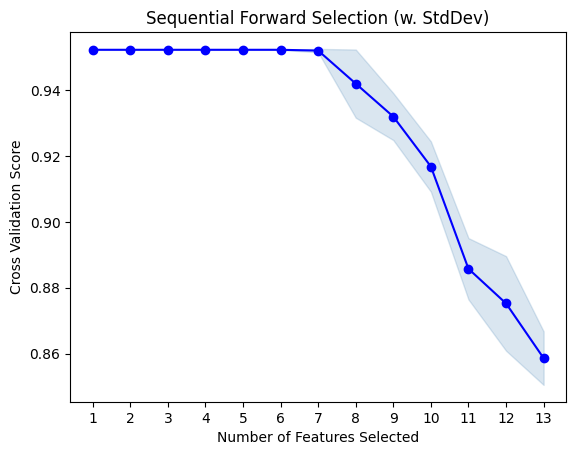

In [ ]:
from sklearn.metrics import classification_report
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import GaussianNB

# Naive Bayes classifier
nb = GaussianNB()

# Sequential forward selection
sfs = SFS(nb,
          k_features='best',  # number of features to select
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)  # using 5-fold cross-validation

sfs.fit(x_train_scaled, y_train)

results = []

metric_dict = sfs.get_metric_dict()

# Mendapatkan nama fitur yang dipilih
feature_names = new_data.drop('stroke', axis=1).columns

for k, subset in sfs.subsets_.items():
    selected_indices = list(subset['feature_idx'])

    # Mengubah x_train_scaled kembali menjadi DataFrame
    x_train_df = pd.DataFrame(x_train_scaled, columns=feature_names)
    x_selected = x_train_df.iloc[:, selected_indices]

    nb.fit(x_selected, y_train)
    y_pred = nb.predict(x_selected)

    selected_feature_names = [feature_names[i] for i in selected_indices]
    report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_feature_names, accuracy_from_report, report, y_pred))

    # Menampilkan hasil untuk setiap jumlah fitur
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_feature_names}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_train, y_pred, zero_division=0))
    print("\n")

# Plot model accuracy
plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.show()


In [ ]:
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report, y_pred = best_result
print("Best Result:")
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(pd.DataFrame(report).transpose())

Best Result:
Number of features selected: 1
Selected features: ['gender']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score      support
0              0.952299  1.000000  0.975567  3893.000000
1              0.000000  0.000000  0.000000   195.000000
accuracy       0.952299  0.952299  0.952299     0.952299
macro avg      0.476150  0.500000  0.487783  4088.000000
weighted avg   0.906874  0.952299  0.929032  4088.000000


### **2. DECISION TREE**

Memilih fitur-fitur terbaik untuk model klasifikasi Decision Tree, untuk memahami dampat dari seleksi fitur terhadap akurasi model.

Number of features selected: 1
Selected features: ['gender']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 2
Selected features: ['gender', 'hypertension']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 3
Selected features: ['gender', 'hypertension', 'heart_dise

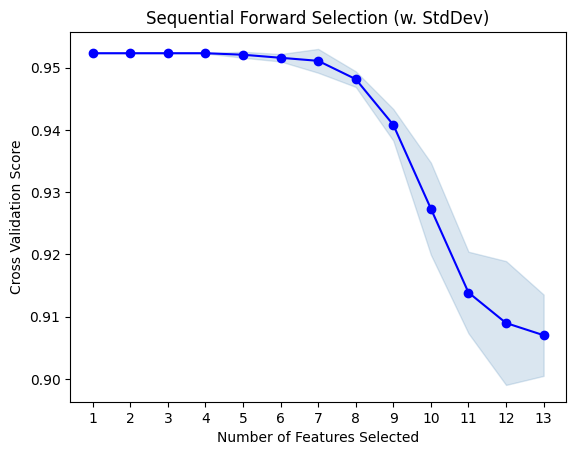

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Sequential forward selection
sfs = SFS(dt,
          k_features='best',  # number of features to select
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)  # using 5-fold cross-validation

sfs.fit(x_train_scaled, y_train)

results = []

metric_dict = sfs.get_metric_dict()

# Mendapatkan nama fitur yang dipilih
feature_names = new_data.drop('stroke', axis=1).columns

for k, subset in sfs.subsets_.items():
    selected_indices = list(subset['feature_idx'])

    # Mengubah x_train_scaled kembali menjadi DataFrame
    x_train_df = pd.DataFrame(x_train_scaled, columns=feature_names)
    x_selected = x_train_df.iloc[:, selected_indices]

    dt.fit(x_selected, y_train)
    y_pred = dt.predict(x_selected)

    selected_feature_names = [feature_names[i] for i in selected_indices]
    report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_feature_names, accuracy_from_report, report, y_pred))

    # Menampilkan hasil untuk setiap jumlah fitur
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_feature_names}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_train, y_pred, zero_division=0))
    print("\n")

# Plot model accuracy
plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report, y_pred = best_result
print("Best Result:")
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(pd.DataFrame(report).transpose())

Best Result:
Number of features selected: 12
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 1.0
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0   3893.0
1                   1.0     1.0       1.0    195.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4088.0
weighted avg        1.0     1.0       1.0   4088.0


### **3. LOGISTIC REGRESION**

Memilih fitur-fitur terbaik untuk model klasifikasi Logistic Regression, untuk memahami dampat dari seleksi fitur terhadap akurasi model.

Number of features selected: 1
Selected features: ['gender']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 2
Selected features: ['gender', 'age']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 3
Selected features: ['gender', 'age', 'hypertension']
Model Accurac

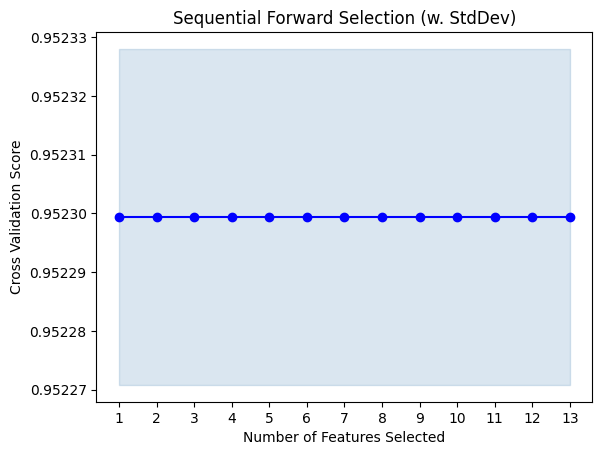

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(lr,
          k_features='best',  # number of features to select
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)  # using 5-fold cross-validation

sfs.fit(x_train_scaled, y_train)

results = []

metric_dict = sfs.get_metric_dict()

# Mendapatkan nama fitur yang dipilih
feature_names = new_data.drop('stroke', axis=1).columns

for k, subset in sfs.subsets_.items():
    selected_indices = list(subset['feature_idx'])

    # Mengubah x_train_scaled kembali menjadi DataFrame
    x_train_df = pd.DataFrame(x_train_scaled, columns=feature_names)
    x_selected = x_train_df.iloc[:, selected_indices]

    lr.fit(x_selected, y_train)
    y_pred = lr.predict(x_selected)

    selected_feature_names = [feature_names[i] for i in selected_indices]
    report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_feature_names, accuracy_from_report, report, y_pred))

    # Menampilkan hasil untuk setiap jumlah fitur
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_feature_names}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_train, y_pred, zero_division=0))
    print("\n")

# Plot model accuracy
plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
# Menentukan hasil terbaik
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_feature_names, accuracy_from_report, report, y_pred
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_feature_names}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(classification_report(y_train, y_pred, zero_division=0))

Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



### **4. RANDOM FOREST**

Memilih fitur-fitur terbaik untuk model klasifikasi Random Forest, untuk memahami dampat dari seleksi fitur terhadap akurasi model.

Number of features selected: 1
Selected features: ['gender']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 2
Selected features: ['gender', 'hypertension']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 3
Selected features: ['gender', 'hypertension', 'heart_dise

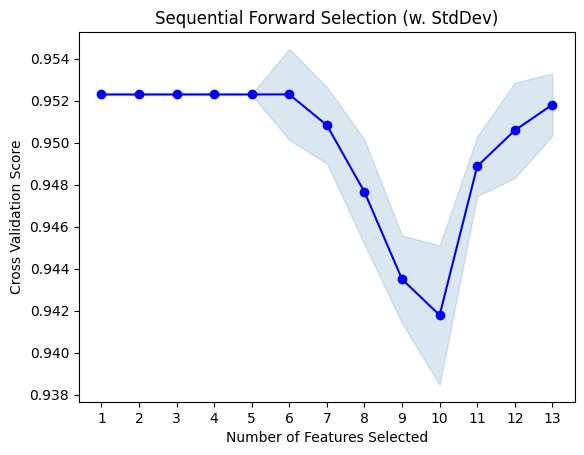

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Sequential forward selection
sfs = SFS(rf,
          k_features='best',  # number of features to select
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)  # using 5-fold cross-validation

sfs.fit(x_train_scaled, y_train)

results = []

metric_dict = sfs.get_metric_dict()

# Mendapatkan nama fitur yang dipilih
feature_names = new_data.drop('stroke', axis=1).columns

for k, subset in sfs.subsets_.items():
    selected_indices = list(subset['feature_idx'])

    # Mengubah x_train_scaled kembali menjadi DataFrame
    x_train_df = pd.DataFrame(x_train_scaled, columns=feature_names)
    x_selected = x_train_df.iloc[:, selected_indices]

    rf.fit(x_selected, y_train)
    y_pred = rf.predict(x_selected)

    selected_feature_names = [feature_names[i] for i in selected_indices]
    report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_feature_names, accuracy_from_report, report, y_pred))

    # Menampilkan hasil untuk setiap jumlah fitur
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_feature_names}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_train, y_pred, zero_division=0))
    print("\n")

# Plot model accuracy
plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
# Menentukan hasil terbaik
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_feature_names, accuracy_from_report, report, y_pred
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_feature_names}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(classification_report(y_train, y_pred, zero_division=0))

Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3893
           1       1.00      1.00      1.00       195

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



### **5. XGBoost**

Memilih fitur-fitur terbaik untuk model klasifikasi XGBoost, untuk memahami dampat dari seleksi fitur terhadap akurasi model.

In [ ]:
!pip install xgboost

Number of features selected: 1
Selected features: ['gender']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 2
Selected features: ['gender', 'hypertension']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 3
Selected features: ['gender', 'hypertension', 'heart_dise

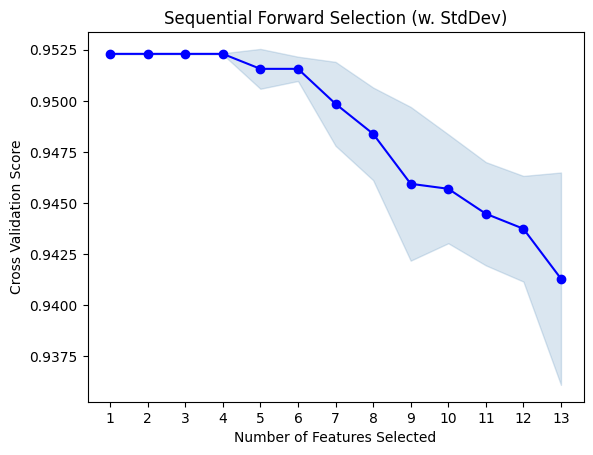

In [ ]:
from xgboost import XGBClassifier

# XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)  # Adjust parameters as needed

# Sequential forward selection

# Sequential forward selection
sfs = SFS(xgb,
          k_features='best',  # number of features to select
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)  # using 5-fold cross-validation

sfs.fit(x_train_scaled, y_train)

results = []

metric_dict = sfs.get_metric_dict()

# Mendapatkan nama fitur yang dipilih
feature_names = new_data.drop('stroke', axis=1).columns

for k, subset in sfs.subsets_.items():
    selected_indices = list(subset['feature_idx'])

    # Mengubah x_train_scaled kembali menjadi DataFrame
    x_train_df = pd.DataFrame(x_train_scaled, columns=feature_names)
    x_selected = x_train_df.iloc[:, selected_indices]

    xgb.fit(x_selected, y_train)
    y_pred = xgb.predict(x_selected)

    selected_feature_names = [feature_names[i] for i in selected_indices]
    report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_feature_names, accuracy_from_report, report, y_pred))

    # Menampilkan hasil untuk setiap jumlah fitur
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_feature_names}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_train, y_pred, zero_division=0))
    print("\n")

# Plot model accuracy
plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.show()


In [ ]:
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report, y_pred = best_result
print("Best Result:")
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(pd.DataFrame(report).transpose())

Best Result:
Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 0.99706457925636
Classification Report:
              precision    recall  f1-score      support
0              0.996927  1.000000  0.998461  3893.000000
1              1.000000  0.938462  0.968254   195.000000
accuracy       0.997065  0.997065  0.997065     0.997065
macro avg      0.998464  0.969231  0.983358  4088.000000
weighted avg   0.997074  0.997065  0.997020  4088.000000


## **SFS BACKWARD**

SBS (Sequential Backward Selection) adalah pendekatan untuk membangun model dengan cara mengurangi satu fitur pada setiap langkahnya dari seluruh set fitur yang ada, berdasarkan kriteria evaluasi yang telah ditetapkan, seperti akurasi atau skor validasi silang. Pendekatan ini kemudian akan diuji menggunakan model Naive Bayes, Decision Tree, Logistic Regression, Random Forest, dan XGBoost.

### **1. NAIVE BAYES**

Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 0.8583659491193738
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3893
           1       0.16      0.46      0.24       195

    accuracy                           0.86      4088
   macro avg       0.56      0.67      0.58      4088
weighted avg       0.93      0.86      0.89      4088



Number of features selected: 12
Selected features: ['gender', 'age', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 0.8781800391389433
Classification Report:
              precision    recall  f1-score   support

           0       0.9

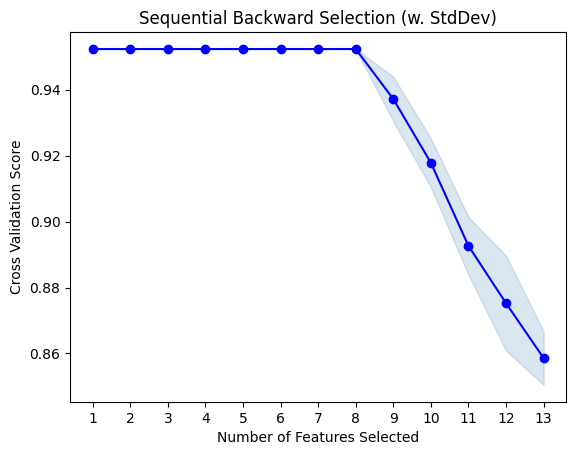

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes classifier
nb = GaussianNB()

# Sequential backward selection
sfs = SFS(nb,
          k_features='best',  # number of features to select
          forward=False,  # Set backward selection
          floating=False,
          scoring='accuracy',  # Consider F1-score for imbalanced classes
          cv=5)  # using cross-validation for more robust feature selection

sfs.fit(x_train_scaled, y_train)

results = []

metric_dict = sfs.get_metric_dict()

# Get feature names
feature_names = x.columns

for k, subset in sfs.subsets_.items():
    selected_indices = list(subset['feature_idx'])
    x_selected = x_train_scaled[:, selected_indices]

    nb.fit(x_selected, y_train)
    y_pred = nb.predict(x_selected)

    selected_feature_names = [feature_names[i] for i in selected_indices]
    report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_feature_names, accuracy_from_report, report, y_pred))

    # Menampilkan hasil untuk setiap jumlah fitur
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_feature_names}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_train, y_pred, zero_division=0))
    print("\n")

# Plot the model accuracy
plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report, y_pred = best_result
print("Best Result:")
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(pd.DataFrame(report).transpose())

Best Result:
Number of features selected: 8
Selected features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'bmi', 'smoking_status', 'glucose_category', 'bmi_category']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score      support
0              0.952299  1.000000  0.975567  3893.000000
1              0.000000  0.000000  0.000000   195.000000
accuracy       0.952299  0.952299  0.952299     0.952299
macro avg      0.476150  0.500000  0.487783  4088.000000
weighted avg   0.906874  0.952299  0.929032  4088.000000


### **2. DECISION TREE**

Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3893
           1       1.00      1.00      1.00       195

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



Number of features selected: 12
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

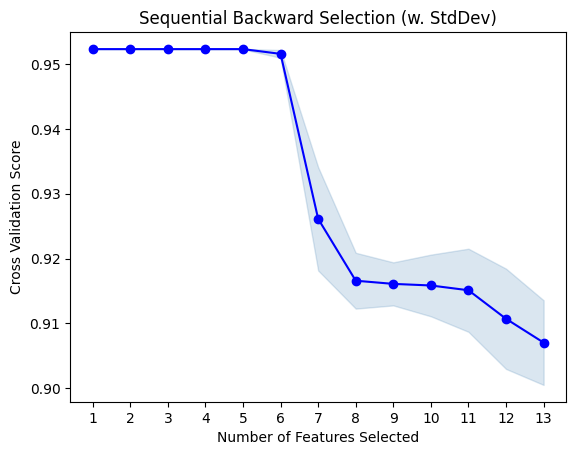

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Sequential backward selection
sfs = SFS(dt,
          k_features='best',  # number of features to select
          forward=False,  # Set backward selection
          floating=False,
          scoring='accuracy',  # Consider F1-score for imbalanced classes
          cv=5)  # using cross-validation for more robust feature selection

sfs.fit(x_train_scaled, y_train)

results = []

metric_dict = sfs.get_metric_dict()

# Get feature names
feature_names = x.columns

for k, subset in sfs.subsets_.items():
    selected_indices = list(subset['feature_idx'])
    x_selected = x_train_scaled[:, selected_indices]

    dt.fit(x_selected, y_train)
    y_pred = dt.predict(x_selected)

    selected_feature_names = [feature_names[i] for i in selected_indices]
    report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_feature_names, accuracy_from_report, report, y_pred))

    # Menampilkan hasil untuk setiap jumlah fitur
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_feature_names}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_train, y_pred, zero_division=0))
    print("\n")

# Plot the model accuracy
plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.show()


In [ ]:
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report, y_pred = best_result
print("Best Result:")
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(pd.DataFrame(report).transpose())

Best Result:
Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 1.0
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0   3893.0
1                   1.0     1.0       1.0    195.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4088.0
weighted avg        1.0     1.0       1.0   4088.0


### **3. LOGISTIC REGRESION**

Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3893
           1       0.00      0.00      0.00       195

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



Number of features selected: 12
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score   support

           0       0.9

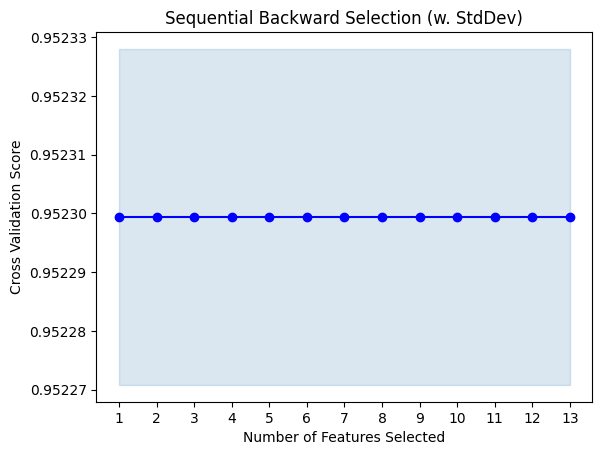

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential backward selection
sfs = SFS(lr,
          k_features='best',  # number of features to select
          forward=False,  # Set backward selection
          floating=False,
          scoring='accuracy',  # Consider F1-score for imbalanced classes
          cv=5)  # using cross-validation for more robust feature selection

sfs.fit(x_train_scaled, y_train)

results = []

metric_dict = sfs.get_metric_dict()

# Get feature names
feature_names = x.columns

for k, subset in sfs.subsets_.items():
    selected_indices = list(subset['feature_idx'])
    x_selected = x_train_scaled[:, selected_indices]

    lr.fit(x_selected, y_train)
    y_pred = lr.predict(x_selected)

    selected_feature_names = [feature_names[i] for i in selected_indices]
    report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_feature_names, accuracy_from_report, report, y_pred))

    # Menampilkan hasil untuk setiap jumlah fitur
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_feature_names}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_train, y_pred, zero_division=0))
    print("\n")

# Plot the model accuracy
plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report, y_pred = best_result
print("Best Result:")
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(pd.DataFrame(report).transpose())

Best Result:
Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 0.9522994129158513
Classification Report:
              precision    recall  f1-score      support
0              0.952299  1.000000  0.975567  3893.000000
1              0.000000  0.000000  0.000000   195.000000
accuracy       0.952299  0.952299  0.952299     0.952299
macro avg      0.476150  0.500000  0.487783  4088.000000
weighted avg   0.906874  0.952299  0.929032  4088.000000


### **4. RANDOM FOREST**

Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3893
           1       1.00      1.00      1.00       195

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



Number of features selected: 12
Selected features: ['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   

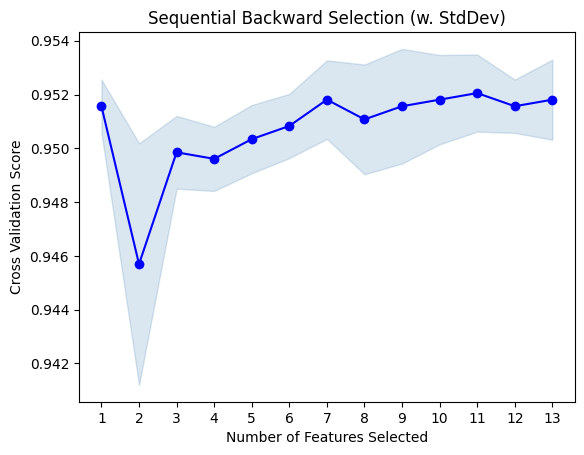

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Sequential backward selection
sfs = SFS(clf,
          k_features='best',  # number of features to select
          forward=False,  # Set backward selection
          floating=False,
          scoring='accuracy',  # Consider F1-score for imbalanced classes
          cv=5)  # using cross-validation for more robust feature selection

sfs.fit(x_train_scaled, y_train)

results = []

metric_dict = sfs.get_metric_dict()

# Get feature names
feature_names = x.columns

for k, subset in sfs.subsets_.items():
    selected_indices = list(subset['feature_idx'])
    x_selected = x_train_scaled[:, selected_indices]

    clf.fit(x_selected, y_train)
    y_pred = clf.predict(x_selected)

    selected_feature_names = [feature_names[i] for i in selected_indices]
    report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_feature_names, accuracy_from_report, report, y_pred))

    # Menampilkan hasil untuk setiap jumlah fitur
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_feature_names}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_train, y_pred, zero_division=0))
    print("\n")

# Plot the model accuracy
plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.show()


In [ ]:
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report, y_pred = best_result
print("Best Result:")
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(pd.DataFrame(report).transpose())

Best Result:
Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 1.0
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0   3893.0
1                   1.0     1.0       1.0    195.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4088.0
weighted avg        1.0     1.0       1.0   4088.0


### **5. XGBoost**

Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 0.99706457925636
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3893
           1       1.00      0.94      0.97       195

    accuracy                           1.00      4088
   macro avg       1.00      0.97      0.98      4088
weighted avg       1.00      1.00      1.00      4088



Number of features selected: 12
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 0.9955968688845401
Classification Report:
              precision    recall  f1-score   support

           0       1.

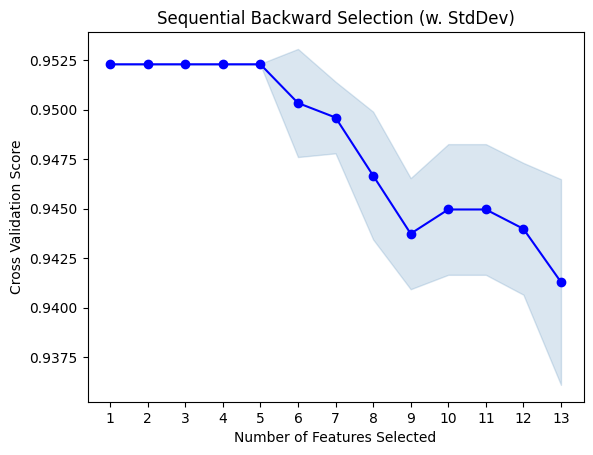

In [ ]:
from xgboost import XGBClassifier

# XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)  # Adjust parameters as needed

# Sequential backward selection
sfs = SFS(xgb,
          k_features='best',  # number of features to select
          forward=False,  # Set backward selection
          floating=False,
          scoring='accuracy',  # Consider F1-score for imbalanced classes
          cv=5)  # using cross-validation for more robust feature selection

sfs.fit(x_train_scaled, y_train)

results = []

metric_dict = sfs.get_metric_dict()

# Get feature names
feature_names = x.columns

for k, subset in sfs.subsets_.items():
    selected_indices = list(subset['feature_idx'])
    x_selected = x_train_scaled[:, selected_indices]

    xgb.fit(x_selected, y_train)
    y_pred = xgb.predict(x_selected)

    selected_feature_names = [feature_names[i] for i in selected_indices]
    report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
    accuracy_from_report = report['accuracy']

    results.append((k, selected_feature_names, accuracy_from_report, report, y_pred))

    # Menampilkan hasil untuk setiap jumlah fitur
    print(f'Number of features selected: {k}')
    print(f'Selected features: {selected_feature_names}')
    print(f'Model Accuracy: {accuracy_from_report}')
    print("Classification Report:")
    print(classification_report(y_train, y_pred, zero_division=0))
    print("\n")

# Plot the model accuracy
plot_sfs(metric_dict, kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
best_result = max(results, key=lambda x: x[2])

# Menampilkan hasil terbaik
k, selected_features, accuracy_from_report, report, y_pred = best_result
print("Best Result:")
print(f'Number of features selected: {k}')
print(f'Selected features: {selected_features}')
print(f'Model Accuracy: {accuracy_from_report}')
print("Classification Report:")
print(pd.DataFrame(report).transpose())

Best Result:
Number of features selected: 13
Selected features: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']
Model Accuracy: 0.99706457925636
Classification Report:
              precision    recall  f1-score      support
0              0.996927  1.000000  0.998461  3893.000000
1              1.000000  0.938462  0.968254   195.000000
accuracy       0.997065  0.997065  0.997065     0.997065
macro avg      0.998464  0.969231  0.983358  4088.000000
weighted avg   0.997074  0.997065  0.997020  4088.000000
